### True Learning Objectives

- How can I process data in Python

#### How do I process data elements in a DataFrame

With the knowledge of **loop** (repetitive action) and **if..else** (conditional statements), we return our focus on DataFrame, this time to examine how to perform data cleaning and preprocessing tasks. 

We will be using the breast cancer diagnostic data set from https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

Let's start by looking at our data. This is the famous Iris flower data set that has been used to demonstrate many data mining/machine learning techniques. 

In [20]:
import pandas as pd
data = pd.read_csv('data/breast-cancer-wisconsin.csv', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 699
Number of attributes = 11


,Sample code,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


To address some issues such as duplication, we will go ahead and drop the `Sample code` column, which can be used to identify unique records in this data set. 

In [21]:
data = data.drop(['Sample code'],axis=1)
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Missing Values

From the data's website (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)), it shows that there are missing values in the data set. Looking at the data's description (https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names), the missing values are replaced by **?**. 

This does not impact how Pandas sees the majority of data attributes for each records:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


However, it impacts how calculations are performed on each column

In [22]:
import numpy as np
print(np.sum(np.asarray([0,1,2,3,4], dtype='int64')))
print(np.sum(data['Bare Nuclei']))

10
1102411010111113391111011071?17111111511111107?31011191183458856110232821211091121104211311112948101111111111610551313101019291083521032121010711011011110112111?11551?821101105311011?1010113?210111111101010111101111010181081810111171111010111105111108110105114111058101105110781101?1029102115121091?1101010810111810101010311010411011041?1117111010101010151011?10?105?110411011010113511111?1081510?11011101410811101011011101011110111181131011310471010331110101111111111111101111101121101111111191141111211?4110310121310111101211111181011111043211111101111016103111511141010111111111111011510131103411011051111111111154111111101011110115101111111011111111121111110115111511111111111101310510101121111111010111101311101011011111111110811101102101111?111211146511111311121111111111214111111110111111111158111111111101011111111151121345


We want to replace **?**, which is a character, with a notation from `Numpy` to indicate that this is a missing numerical value. This notation in `Numpy` is `NaN` (not a number). 

In [26]:
data = data.replace('?',np.NaN)

print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))
print (data.info())

Number of instances = 699
Number of attributes = 10
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB
None


Only column `Bare Nuclei` has missing values, and after modification, it changes from a numerical column to a generic object column. 

In [ ]:
print(np.sum(data['Bare Nuclei']))

DataFrame allows you to convert the data type

In [36]:
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
print(np.sum(data['Bare Nuclei']))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))
print (data.info())

2421.0
Number of missing values:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0
	Class: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    683 non-null float64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
None


Now that we know where the missing values are, how can we preprocess them?
- Replace missing values with median values
- Omit missing values

In [37]:
data2 = data['Bare Nuclei']

print('Before replacing missing values:')
print(data2[20:25])
data2 = data2.fillna(data2.median())

print('\nAfter replacing missing values:')
print(data2[20:25])

Before replacing missing values:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64

After replacing missing values:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


In [39]:
data3 = data['Bare Nuclei']
print('Before replacing missing values:')
print(data3[20:25])

data3 = data3.dropna()

print('\nAfter replacing missing values:')
print(data3[20:25])

Before replacing missing values:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64

After replacing missing values:
20    10.0
21     7.0
22     1.0
24     1.0
25     7.0
Name: Bare Nuclei, dtype: float64


Let's drop the outliers

In [53]:
data = data.dropna()

### Outliers

Outliers are data instances with characteristics that are considerably different from the rest of the dataset. Outliers can be observed visually using boxplot. 

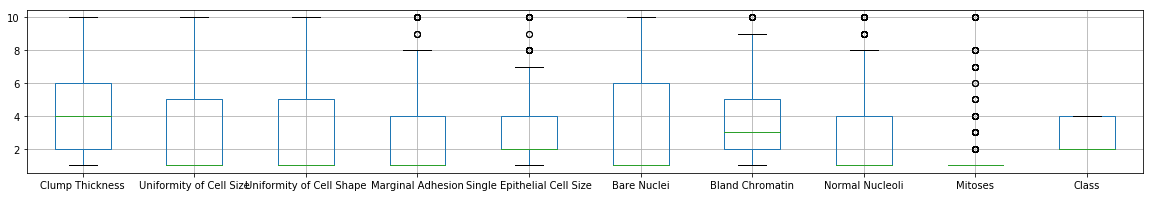

In [54]:
%matplotlib inline

#data2 = data.drop(['Class'],axis=1)
data.boxplot(figsize=(20,3))

To discard the outliers, we can compute the Z-score for each attribute and remove those instances containing attributes with abnormally high or low Z-score (e.g., if Z > 3 or Z <= -3).

In [55]:
z = (data-data.mean())/data.std()
print (z[20:25])

    Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
20         0.906788                -0.049200                 -0.406623   
21         1.970331                 0.603298                  0.597198   
22        -0.511269                -0.701698                 -0.741230   
24        -1.220297                -0.701698                 -0.741230   
25         0.197760                -0.375449                 -0.072016   

    Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
20           2.502944                     0.794274     1.771569   
21           0.059290                     1.244099     0.948266   
22          -0.638897                    -0.555202    -0.698341   
24          -0.638897                    -0.555202    -0.698341   
25           0.408383                    -0.555202     0.948266   

    Bland Chromatin  Normal Nucleoli   Mitoses     Class  
20         0.634734         0.370269  1.383283  1.361991  
21         1.451161         2.3357

In [56]:
z1 = stats.zscore(data)
print (z1[20:25])

[[ 0.90745276 -0.0492361  -0.40692142  2.5047784   0.79485628  1.77286724
   0.63519882  0.37054027  1.3842969   1.36298958]
 [ 1.97177486  0.6037398   0.59763519  0.05933312  1.24501121  0.94896047
   1.4522248   2.33747554 -0.34839971  1.36298958]
 [-0.51164337 -0.70221201 -0.74177362 -0.63936553 -0.5556085  -0.69885309
  -0.59034015 -0.61292736 -0.34839971 -0.73368133]
 [-1.22119144 -0.70221201 -0.74177362 -0.63936553 -0.5556085  -0.69885309
  -0.18182716 -0.61292736 -0.34839971 -0.73368133]
 [ 0.19790469 -0.37572406 -0.07206921  0.40868245 -0.5556085   0.94896047
  -0.18182716  1.02618536 -0.34839971  1.36298958]]


In [57]:
print(z.shape)
print(data.shape)

(683, 10)
(683, 10)


**SciPy** to the rescue

In [60]:
from scipy import stats
import numpy as np

data_no_outlier = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
print(data_no_outlier.shape)

(632, 10)


In [61]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data.loc[[11,28]]

Number of duplicate rows = 234


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
11,2,1,1,1,2,1.0,2,1,1,2
28,2,1,1,1,2,1.0,2,1,1,2


We can drop duplicates:

In [62]:
print('Number of rows before discarding duplicates = %d' % (data.shape[0]))
data = data.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data.shape[0]))

Number of rows before discarding duplicates = 683
Number of rows after discarding duplicates = 449


**Aggregation (slide 3)**

Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes (1) reducing the size of data to be processed, (2) changing the granularity of analysis (from fine-scale to coarser-scale), and (3) improving the stability of the data.

In the example below, we will use the daily precipitation time series data for a weather station located at Detroit Metro Airport. The raw data was obtained from the Climate Data Online website (https://www.ncdc.noaa.gov/cdo-web/). The daily precipitation time series will be compared against its monthly values.

In [73]:
daily = pd.read_csv('data/DTW_prec.csv', header='infer')
print(daily.info())
print(daily.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6191 entries, 0 to 6190
Data columns (total 2 columns):
DATE    6191 non-null object
PRCP    6191 non-null float64
dtypes: float64(1), object(1)
memory usage: 96.8+ KB
None
       DATE  PRCP
0  1/1/2001  0.00
1  1/2/2001  0.00
2  1/3/2001  0.00
3  1/4/2001  0.04
4  1/5/2001  0.14


We convert this DataFrame into a `Series`, which is an indexed vector structure in Pandas. 

In [74]:
daily.index = pd.to_datetime(daily['DATE'])
daily = daily['PRCP']
print(daily.head())

DATE
2001-01-01    0.00
2001-01-02    0.00
2001-01-03    0.00
2001-01-04    0.04
2001-01-05    0.14
Name: PRCP, dtype: float64


Text(0.5, 1.0, 'Daily Precipitation (variance = 0.0530)')

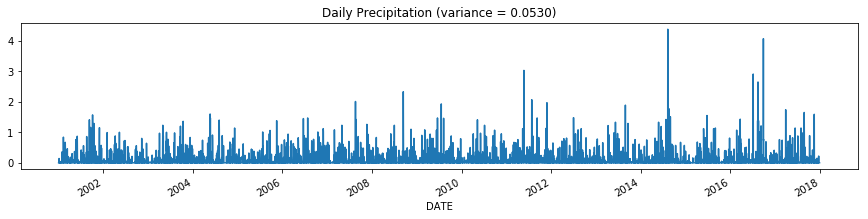

In [63]:
ax = daily.plot(kind='line',figsize=(15,3))
ax.set_title('Daily Precipitation (variance = %.4f)' % (daily.var()))

Pandas allows us to quickly changing the granularity of analysis through function `groupby`. The documentation of groupby for `Series` is at:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.groupby.html

Text(0.5, 1.0, 'Monthly Precipitation (variance = 2.4241)')

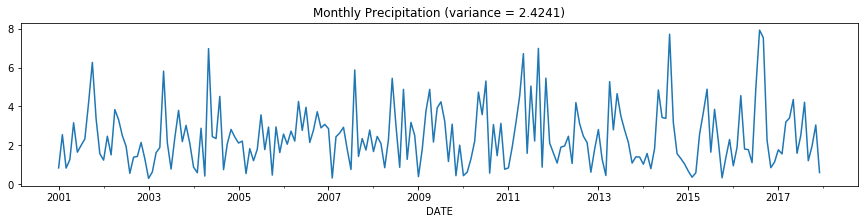

In [75]:
monthly = daily.groupby(pd.Grouper(freq='M')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

## Question 5:
Modify the code below so that it groups the time series data by year. 
*Hint: If month is M, what will year be?*

In [ ]:
monthly = daily.groupby(pd.Grouper(freq='__')).sum()
ax = monthly.plot(kind='line',figsize=(15,3))
ax.set_title('Monthly Precipitation (variance = %.4f)' % (monthly.var()))

**Sampling (slide 7)**

Sampling is an approach commonly used to facilitate 
- data reduction for exploratory data analysis and scaling up algorithms to big data applications and
- quantifying uncertainties due to varying data distributions. 

There are various methods available for data sampling, such as sampling without replacement, where each selected instance is removed from the dataset, and sampling with replacement, where each selected instance is not removed, thus allowing it to be selected more than once in the sample.

In the example below, we will apply sampling with replacement and without replacement to the breast cancer dataset obtained from the UCI machine learning repository.

#### Without replacement (no possible duplication)

In [81]:
tmp_data = data.head(10)
sample = tmp_data.sample(n=4)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
4,4,1,1,3,2,1.0,3,1,1,2
6,1,1,1,1,2,10.0,3,1,1,2
0,5,1,1,1,2,1.0,3,1,1,2
5,8,10,10,8,7,10.0,9,7,1,4


We can also specify the fraction of data we want to sample

In [98]:
sample = tmp_data.sample(frac=0.25)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
8,2,1,1,1,2,1.0,1,1,5,2
5,8,10,10,8,7,10.0,9,7,1,4


#### With replacement (there could be duplications)

In [96]:
sample = tmp_data.sample(frac=0.3, replace = True)
sample

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
2,3,1,1,1,2,2.0,3,1,1,2
2,3,1,1,1,2,2.0,3,1,1,2
0,5,1,1,1,2,1.0,3,1,1,2
